# Plotting


## Below is the original implementation (i.e., +1 reward for a correct answer, and 0 for a wrong answer.)

<img src="./figures/des_size=l-capacity=32-test_total_reward_mean.svg" alt="drawing" width="600"/>
<img src="./figures/des_size=l-capacity=all-test_total_reward_mean.svg" alt="drawing" width="1000"/>

There were three more experiments that are not in the plot:

1. Episodic only, capacity=32, avg. and std. of total test rewards=(91.74, 1.627)
2. Semantic only, capacity=32, avg. and std. of total test rewards=(94.86, 1.198)
3. Semantic only, pretrained, capacity=32, avg. and std. of total test rewards=(93.480, 2.084)

The reason why they were not mentioned in the paper is that the performance is not so different from the two baseline heuristics.

STEP: 86

SCRATCH: {'state': ["[{'human': 'Gloria', 'object': 'sheep', 'object_location': 'lap', 'timestamp': 23}, {'human': 'James', 'object': 'bicycle', 'object_location': 'nursery', 'timestamp': 28}, {'human': 'Jean', 'object': 'sandwich', 'object_location': 'lunchbox', 'timestamp': 29}, {'human': 'Jose', 'object': 'dog', 'object_location': 'kennel', 'timestamp': 33}, {'human': 'Judith', 'object': 'bird', 'object_location': 'kitchen', 'timestamp': 34}, {'human': 'Keith', 'object': 'sheep', 'object_location': 'cupboard', 'timestamp': 38}, {'human': 'Lauren', 'object': 'bird', 'object_location': 'countryside', 'timestamp': 41}, {'human': 'Lisa', 'object': 'car', 'object_location': 'lunchbox', 'timestamp': 43}, {'human': 'Matthew', 'object': 'car', 'object_location': 'apartment', 'timestamp': 47}, {'human': 'Roger', 'object': 'train', 'object_location': 'farm', 'timestamp': 57}, {'human': 'Alexander', 'object': 'keyboard', 'object_location': 'desk', 'timestamp': 64}, {'human': 'Anthony

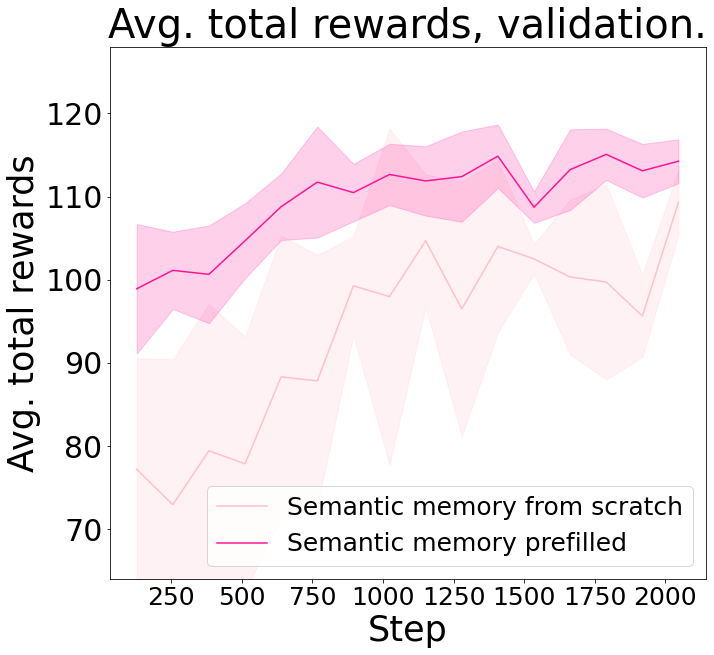

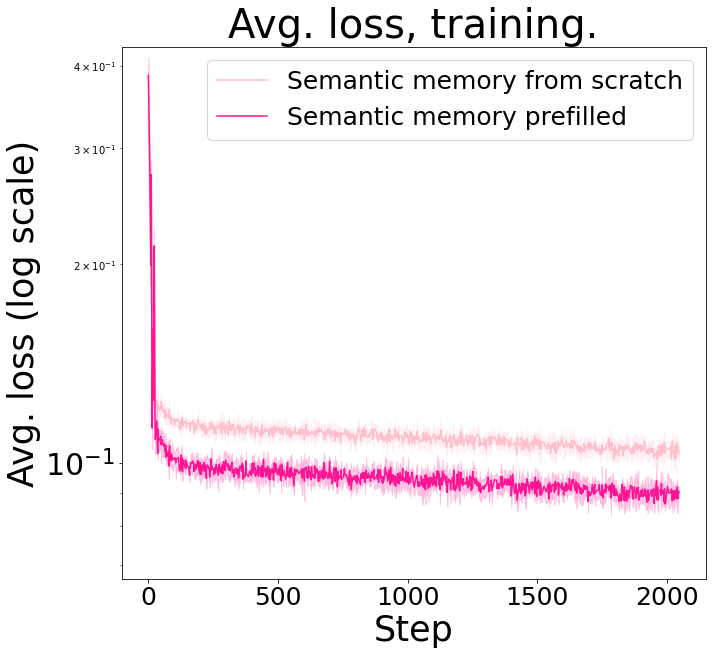

In [1]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import logging

logging.disable()

from plotting import plot_training_validation_results
from utils import read_json

plot_training_validation_results(
    data_dir="./data/v1-original",
    kind="val_total_reward_mean",
    capacity=32,
    save_dir="./figures/",
    ymin=64,
    ymax=128,
    ylog=False,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="lower right",
)

plot_training_validation_results(
    data_dir="./data/v1-original",
    kind="train_loss",
    capacity=32,
    save_dir="./figures/",
    ymin=None,
    ymax=None,
    ylog=True,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="upper right",
)


test_debug_scratch_path = "./models/v1-original/des_size=l-capacity=32-pretrain=False-gpus=0-seed=1/test_debug-mean=115.0-std=3.225.json"
test_debug_scratch = read_json(test_debug_scratch_path)["0"]
test_debug_pretrained_path = "./models/v1-original/des_size=l-capacity=32-pretrain=True-gpus=0-seed=2/test_debug-mean=117.5-std=2.54.json"
test_debug_pretrained = read_json(test_debug_pretrained_path)["0"]

for step in [86]:
    print(f"STEP: {step}")
    print()
    print(f"SCRATCH: {test_debug_scratch[step]}")
    print()
    print(f"PRETRAINED: {test_debug_pretrained[step]}")
    print()
    print(
        "----------------------------------------------------------------------------"
    )

## Below results include some modifications to the original implementation (v1-question_prob=1.0)

1. +1 reward for a correct answer, and -1 for a wrong answer.


STEP: 86

SCRATCH: {'state': ["[{'human': 'Gloria', 'object': 'sheep', 'object_location': 'lap', 'timestamp': 23}, {'human': 'Isabella', 'object': 'train', 'object_location': 'kitchen', 'timestamp': 25}, {'human': 'James', 'object': 'bicycle', 'object_location': 'nursery', 'timestamp': 28}, {'human': 'Julie', 'object': 'car', 'object_location': 'city', 'timestamp': 35}, {'human': 'Keith', 'object': 'sheep', 'object_location': 'cupboard', 'timestamp': 38}, {'human': 'Lauren', 'object': 'bird', 'object_location': 'countryside', 'timestamp': 41}, {'human': 'Lisa', 'object': 'car', 'object_location': 'lunchbox', 'timestamp': 43}, {'human': 'Martha', 'object': 'elephant', 'object_location': 'circus', 'timestamp': 46}, {'human': 'Matthew', 'object': 'car', 'object_location': 'apartment', 'timestamp': 47}, {'human': 'Teresa', 'object': 'keyboard', 'object_location': 'desk', 'timestamp': 62}, {'human': 'Alexander', 'object': 'keyboard', 'object_location': 'desk', 'timestamp': 64}, {'human': 'A

/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equa

64 16 28


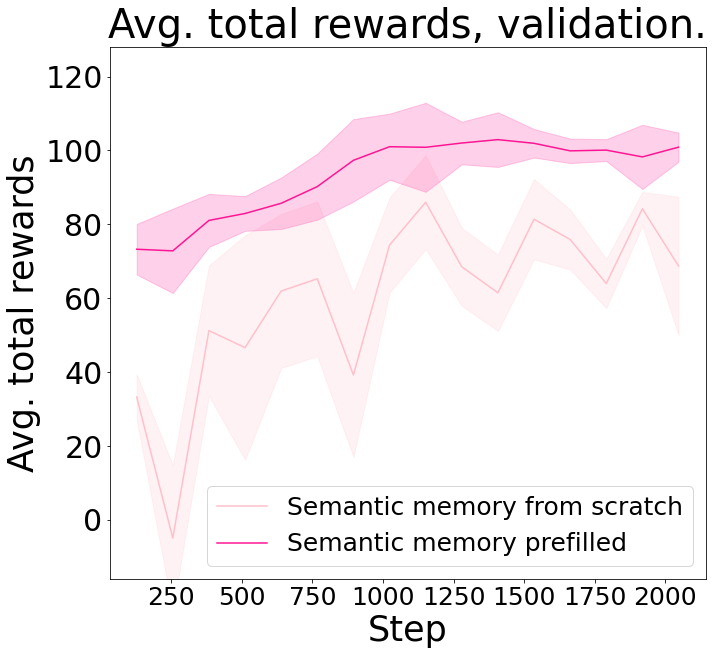

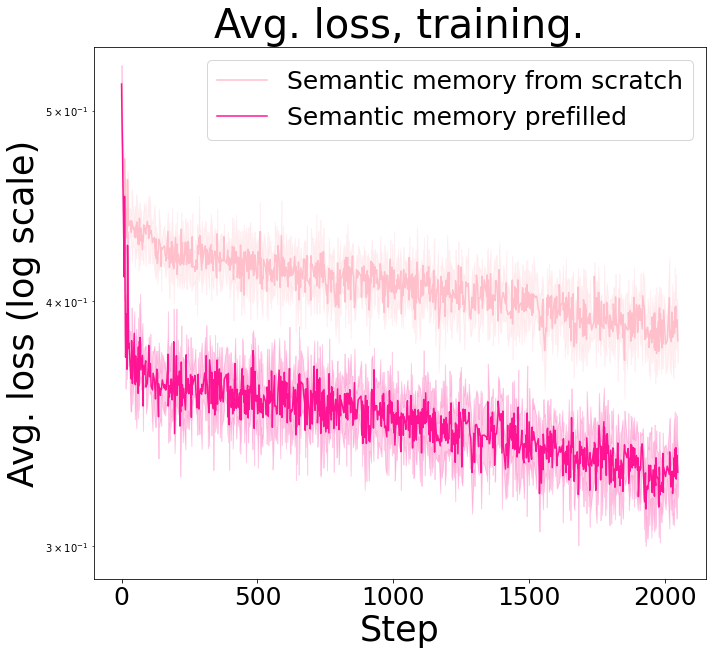

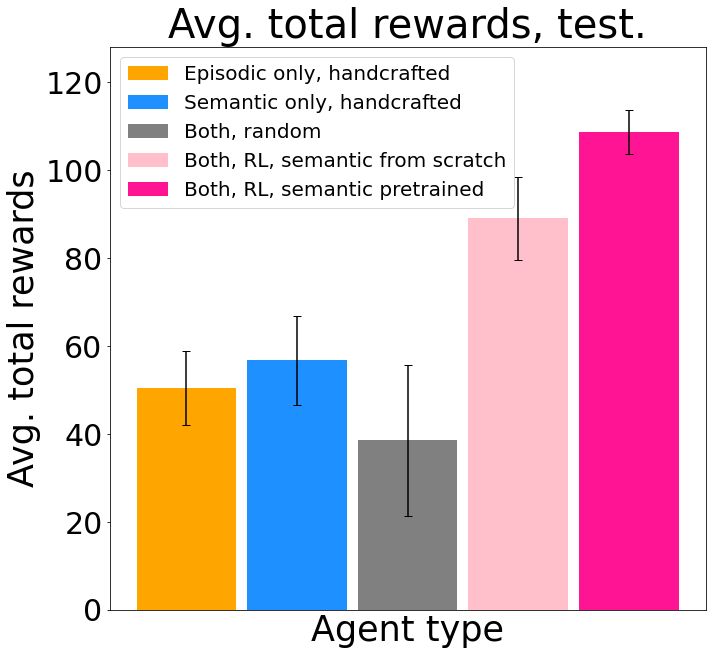

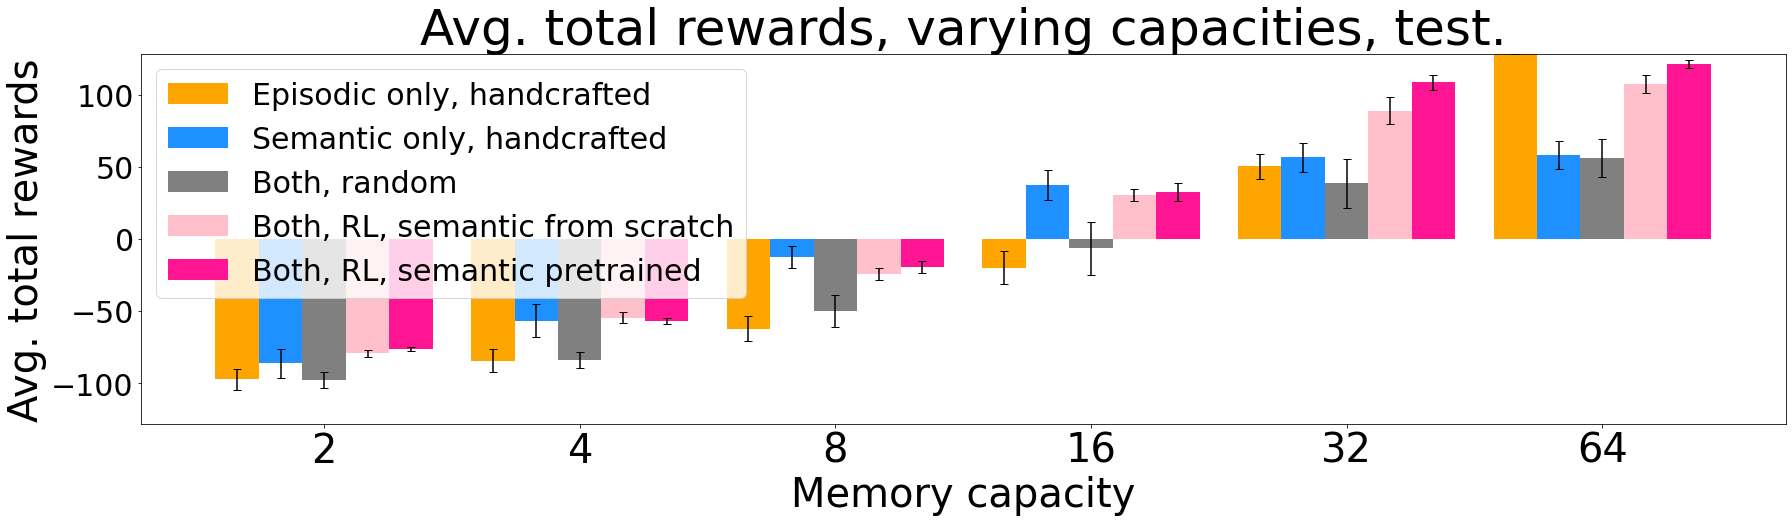

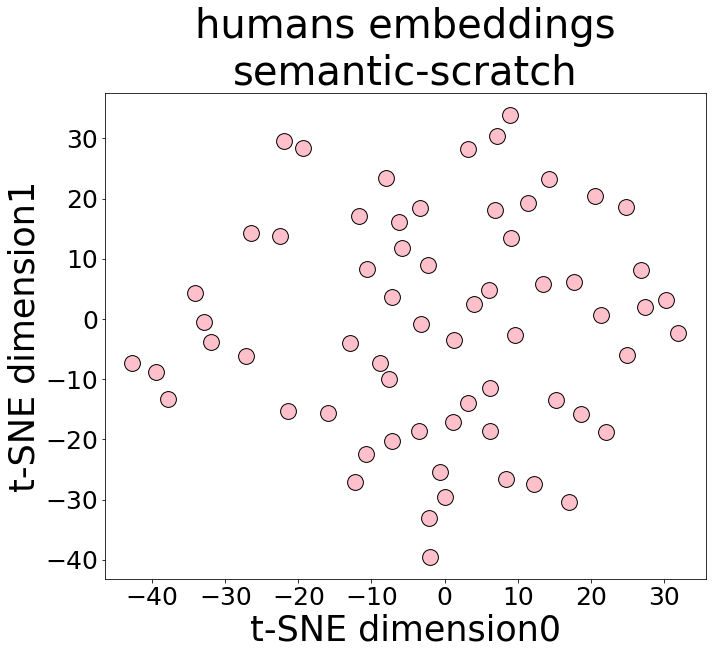

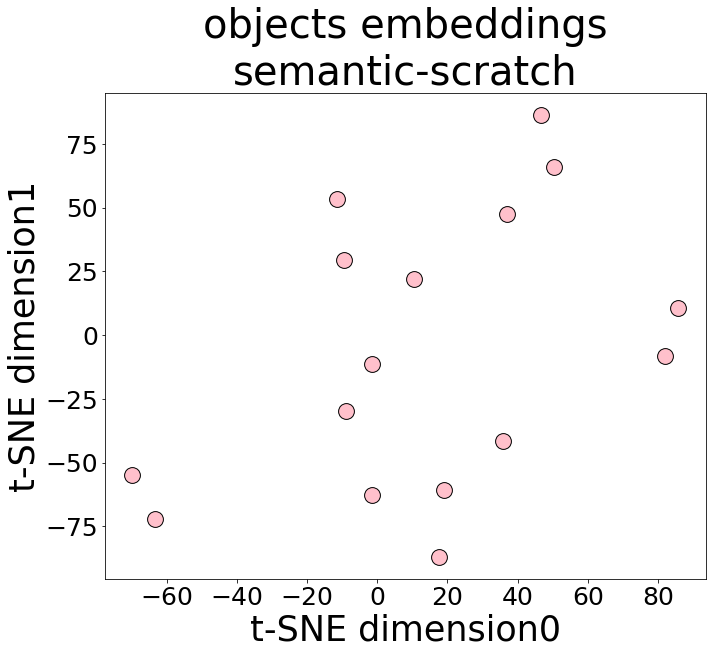

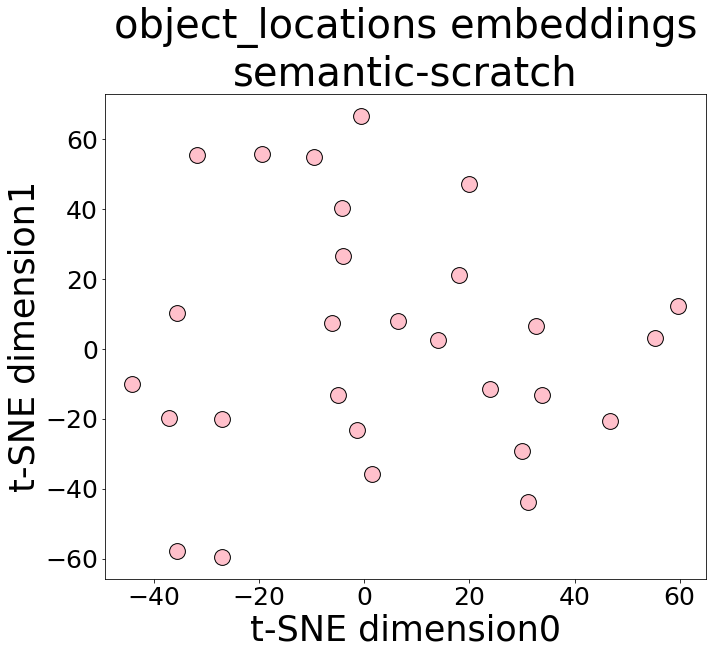

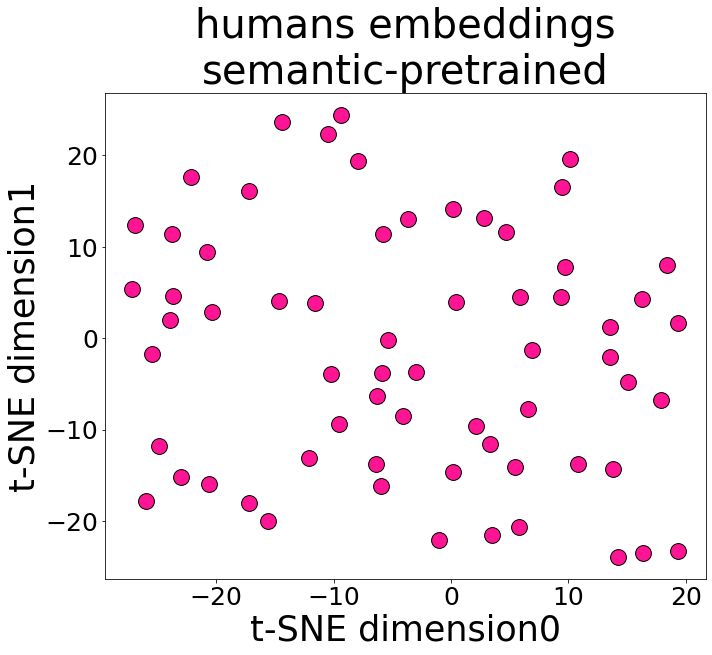

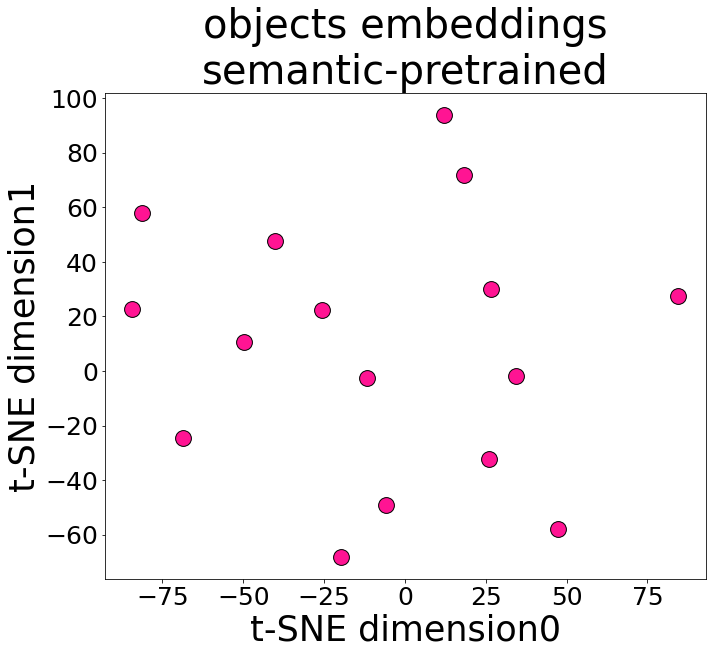

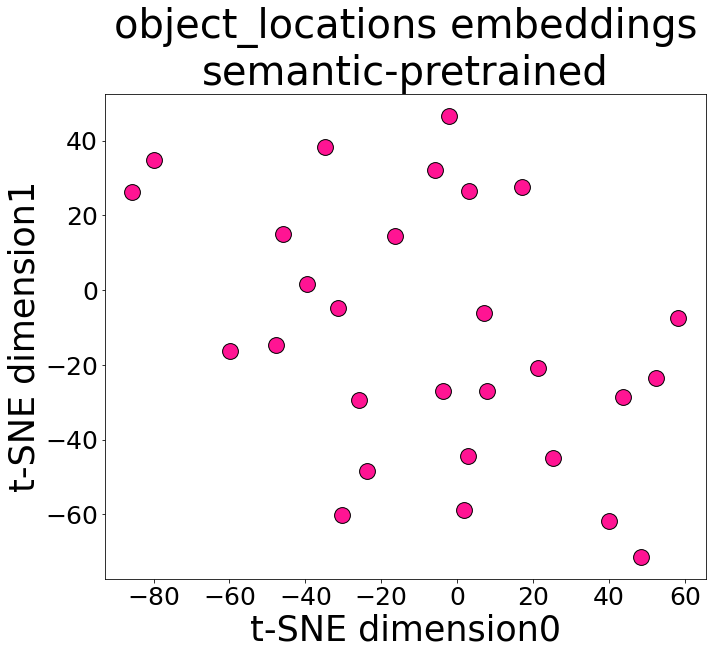

In [2]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import logging

logging.disable()

from plotting import (
    plot_training_validation_results,
    plot_test_results,
    plot_test_results_all_capacities,
    UnderstandModel,
)
from utils import read_json


plot_training_validation_results(
    data_dir="./data/v1-question_prob=1.0",
    kind="val_total_reward_mean",
    capacity=32,
    save_dir="./figures/",
    ymin=-16,
    ymax=128,
    ylog=False,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="lower right",
)

plot_training_validation_results(
    data_dir="./data/v1-question_prob=1.0",
    kind="train_loss",
    capacity=32,
    save_dir="./figures/",
    ymin=None,
    ymax=None,
    ylog=True,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="upper right",
)

plot_test_results(
    data_dir="./data/v1-question_prob=1.0",
    capacity=32,
    save_dir="./figures/",
    ymin=0,
    ymax=128,
    des_size="l",
    figsize=(10, 10),
    legend_loc="upper left",
    question_prob=1.0,
    allow_random_human=False,
    allow_random_question=False,
    version="v1",
)

plot_test_results_all_capacities(
    data_dir="./data/v1-question_prob=1.0",
    save_dir="./figures/",
    ymin=-128,
    ymax=128,
    des_size="l",
    figsize=(25, 8),
    legend_loc="upper left",
    question_prob=1.0,
    allow_random_human=False,
    allow_random_question=False,
    version="v1",
)


test_debug_scratch_path = "./models/v1-question_prob=1.0/des_version=v1_allow_random_human=False_allow_random_question=False_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_seed=1/test_debug-mean=99.2-std=7.222.json"
test_debug_scratch = read_json(test_debug_scratch_path)["0"]
test_debug_pretrained_path = "./models/v1-question_prob=1.0/des_version=v1_allow_random_human=False_allow_random_question=False_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_seed=0/test_debug-mean=115.6-std=3.441.json"
test_debug_pretrained = read_json(test_debug_pretrained_path)["0"]

for step in [86]:
    print(f"STEP: {step}")
    print()
    print(f"SCRATCH: {test_debug_scratch[step]}")
    print()
    print(f"PRETRAINED: {test_debug_pretrained[step]}")
    print()
    print(
        "----------------------------------------------------------------------------"
    )

um = UnderstandModel(
    model_scratch_path="./models/v1-question_prob=1.0/des_version=v1_allow_random_human=False_allow_random_question=False_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_seed=1/checkpoints/epoch=05-val_total_reward_mean=98.20-val_total_reward_std=6.16.ckpt",
    model_pretrained_path="./models/v1-question_prob=1.0/des_version=v1_allow_random_human=False_allow_random_question=False_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_seed=0/checkpoints/epoch=08-val_total_reward_mean=117.80-val_total_reward_std=4.33.ckpt",
)

um.compute_reduction(
    tsne_params={
        "n_components": 2,
        "perplexity": 5,
        "init": "pca",
        "learning_rate": "auto",
    }
)

print(
    len(um.indices["humans"]),
    len(um.indices["objects"]),
    len(um.indices["object_locations"]),
)

for semantic in ["scratch", "pretrained"]:
    for interest in ["humans", "objects", "object_locations"]:
        um.plot_embeddings(semantic=semantic, interest=interest)

## Below results include some _more_ modifications to the original implementation (v2-question_prob=0.1)

1. There have been some modifications to the trajectories of the humans.
2. +1 reward for a correct answer, and -1 for a wrong answer.
3. Every time an agent takes an action, there is 0.1 chance of a question being asked. It's stochastic now.
4. The env can also ask a question that's different from the agent's previous observations. For example, let's say the agent observed <Bob's laptop, AtLocation, desk> at $t=10$. At $t=11$, Bob moved the laptop so the global state of the model is now <Bob's laptop, AtLocation, cupboard>. In the previous version, at $t=12$, the environment did **NOT** ask where Bob's laptop is, but now with this modification in the version 2, it can.


STEP: 86

SCRATCH: {'state': ["[{'human': 'Keith', 'object': 'train', 'object_location': 'zoo', 'timestamp': 38}, {'human': 'Laura', 'object': 'bird', 'object_location': 'nursery', 'timestamp': 40}, {'human': 'Lisa', 'object': 'dog', 'object_location': 'city', 'timestamp': 43}, {'human': 'Marilyn', 'object': 'handbag', 'object_location': 'store', 'timestamp': 45}, {'human': 'Martha', 'object': 'car', 'object_location': 'city', 'timestamp': 46}, {'human': 'Matthew', 'object': 'boat', 'object_location': 'classroom', 'timestamp': 47}, {'human': 'Michael', 'object': 'elephant', 'object_location': 'circus', 'timestamp': 48}, {'human': 'Nancy', 'object': 'donut', 'object_location': 'park', 'timestamp': 49}, {'human': 'Natalie', 'object': 'sheep', 'object_location': 'farm', 'timestamp': 50}, {'human': 'Nicholas', 'object': 'keyboard', 'object_location': 'desk', 'timestamp': 51}, {'human': 'Olivia', 'object': 'donut', 'object_location': 'kitchen', 'timestamp': 52}, {'human': 'Patricia', 'objec

/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/tk/.virtualenvs/dev-python3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equa

64 16 29


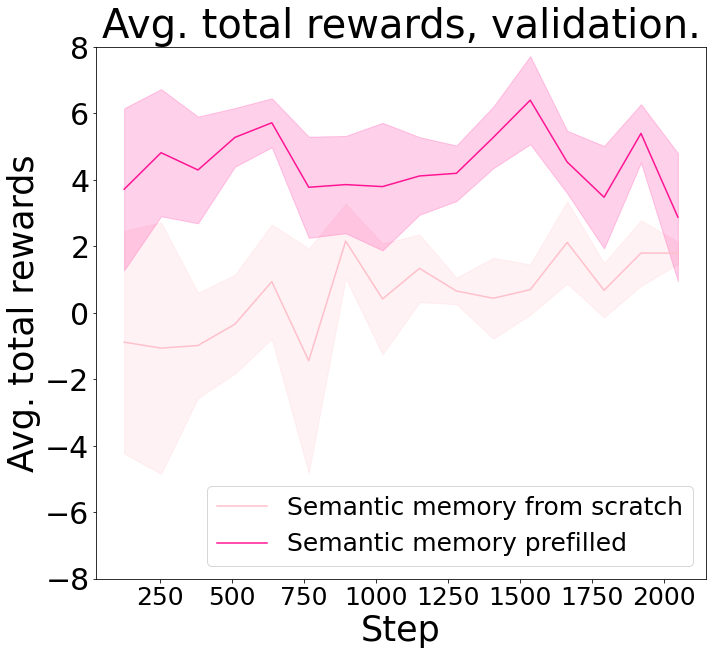

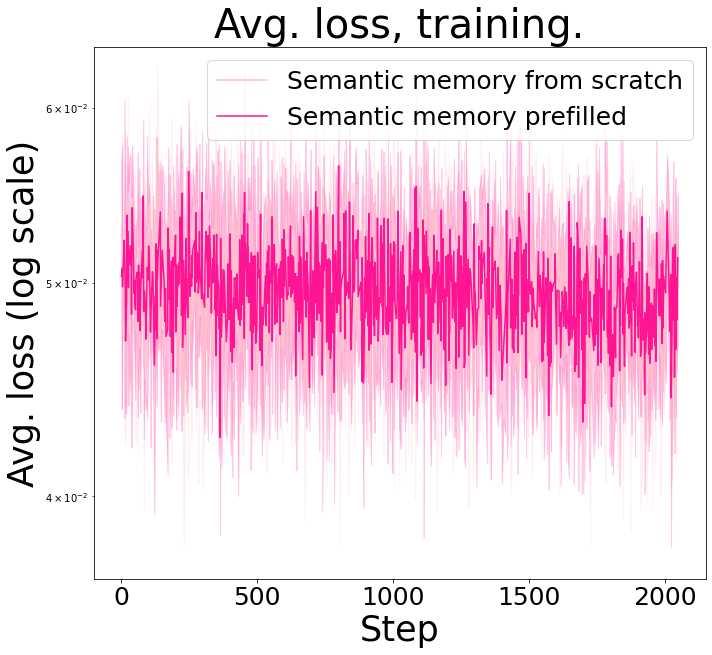

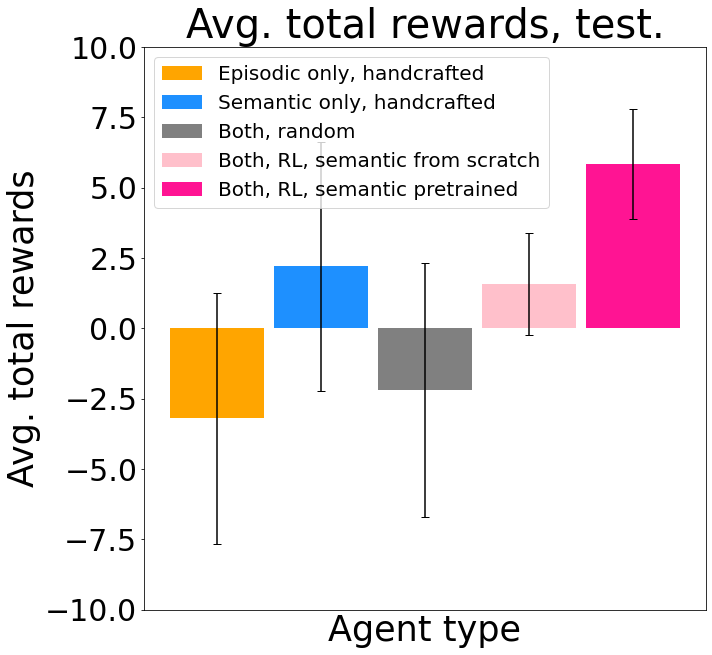

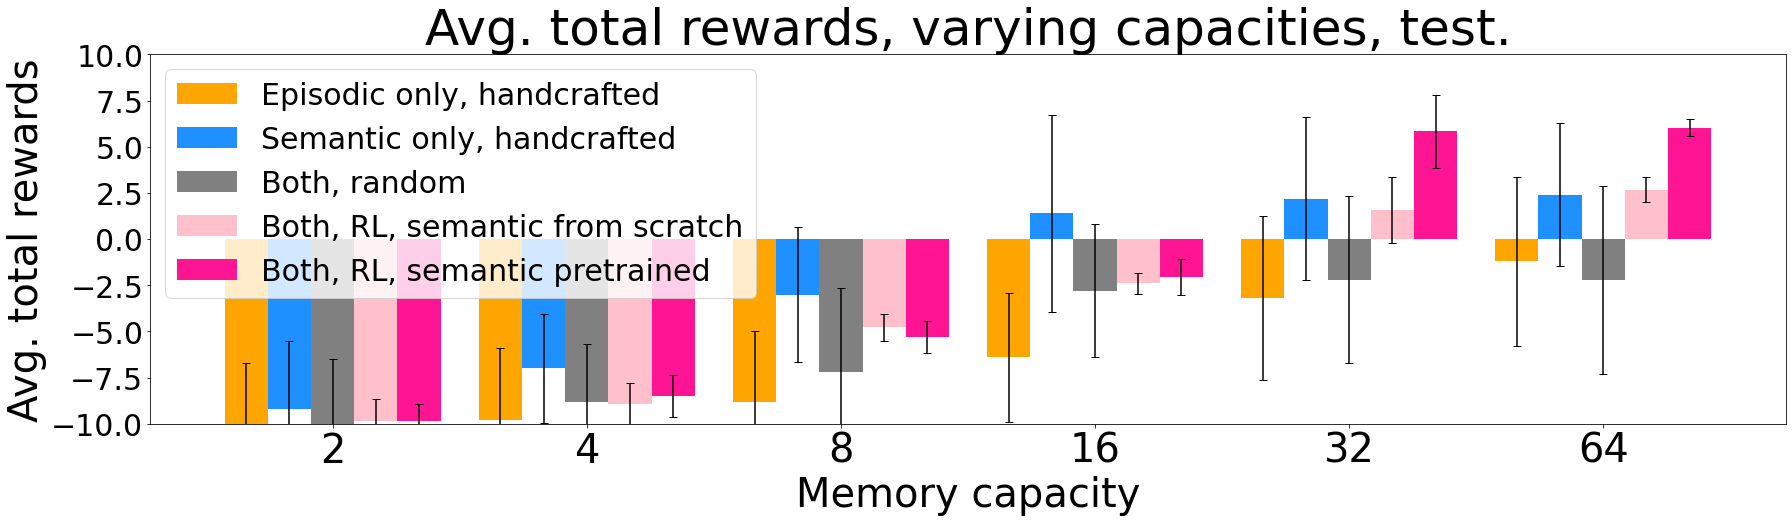

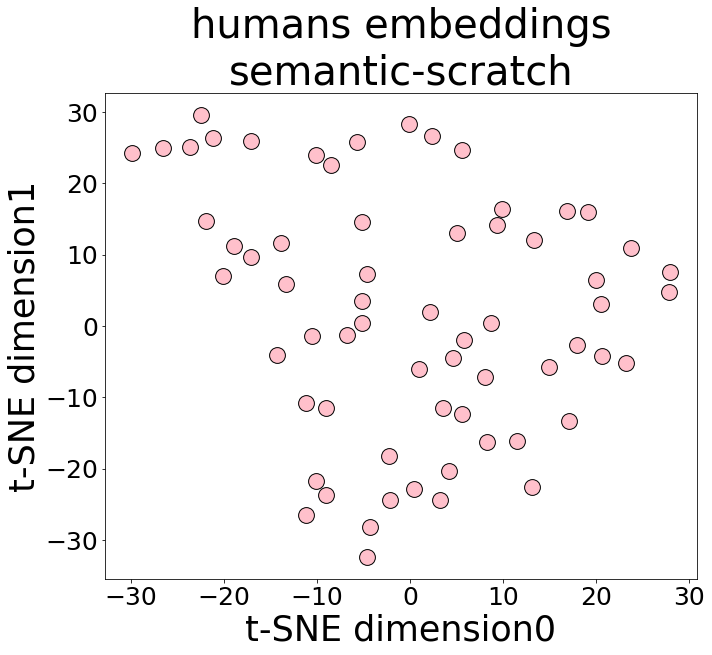

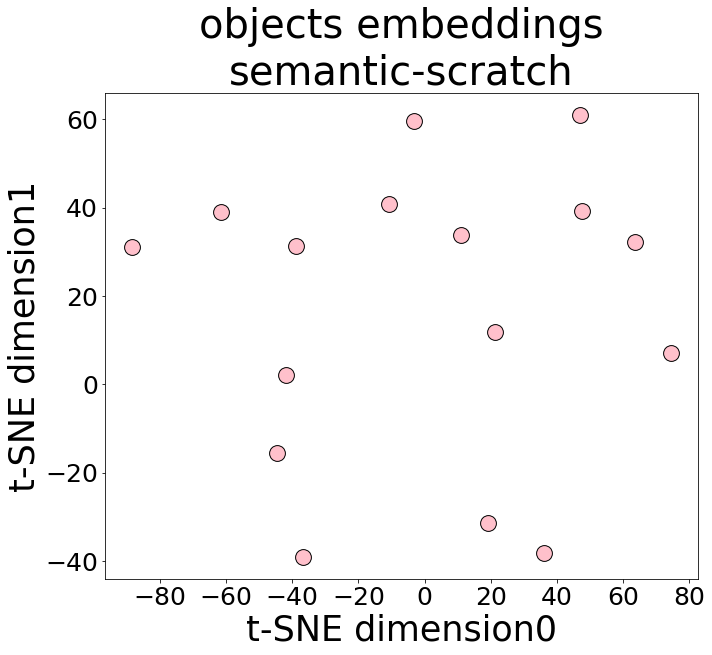

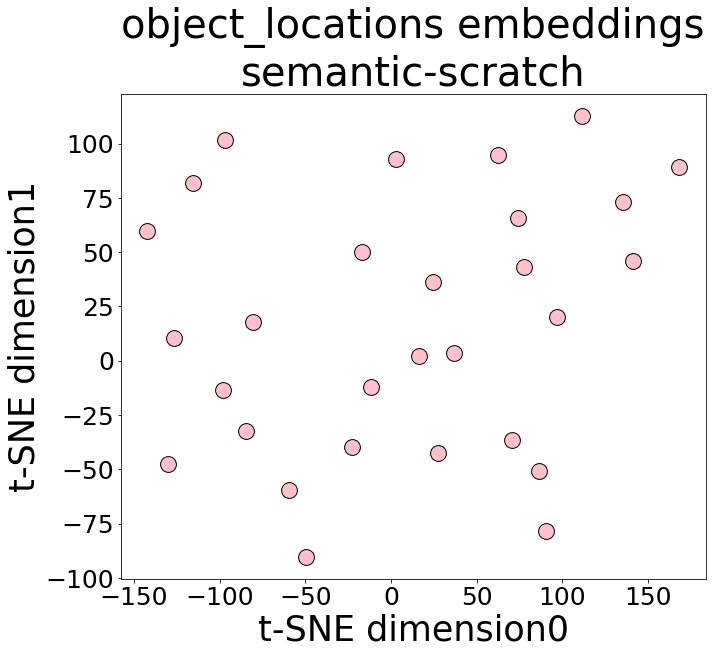

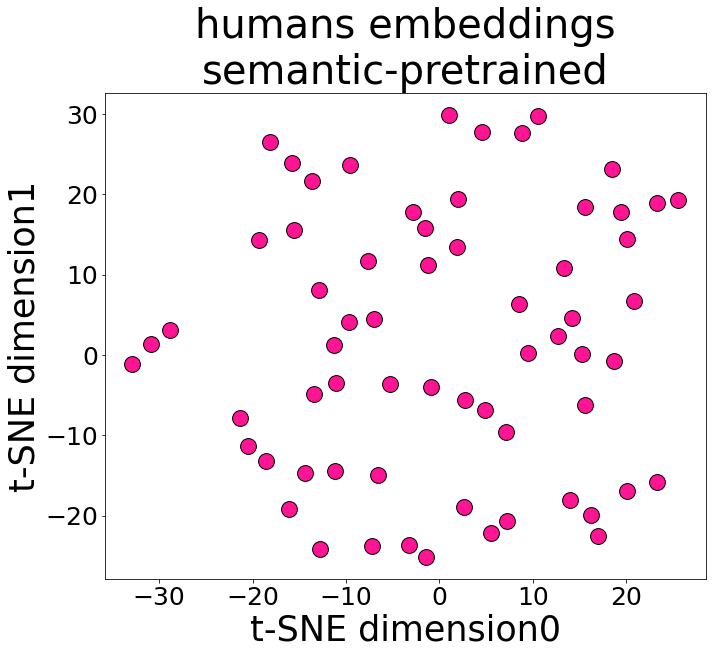

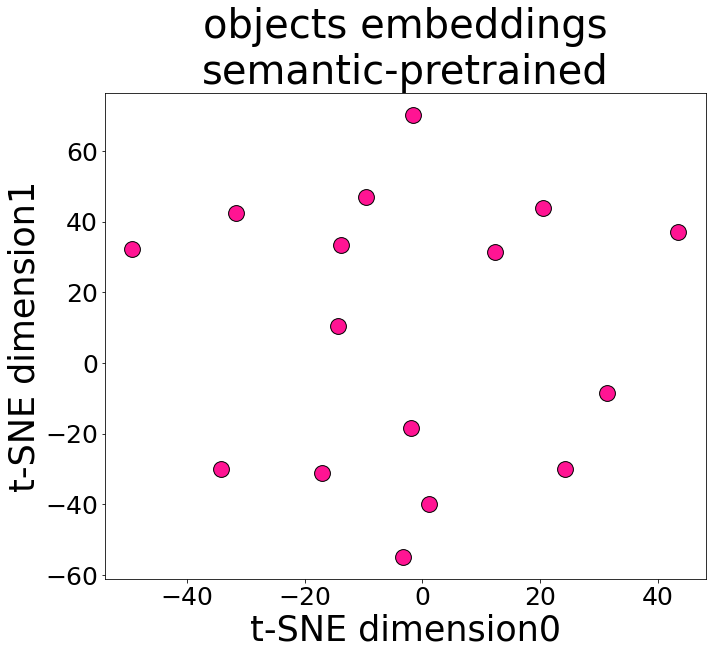

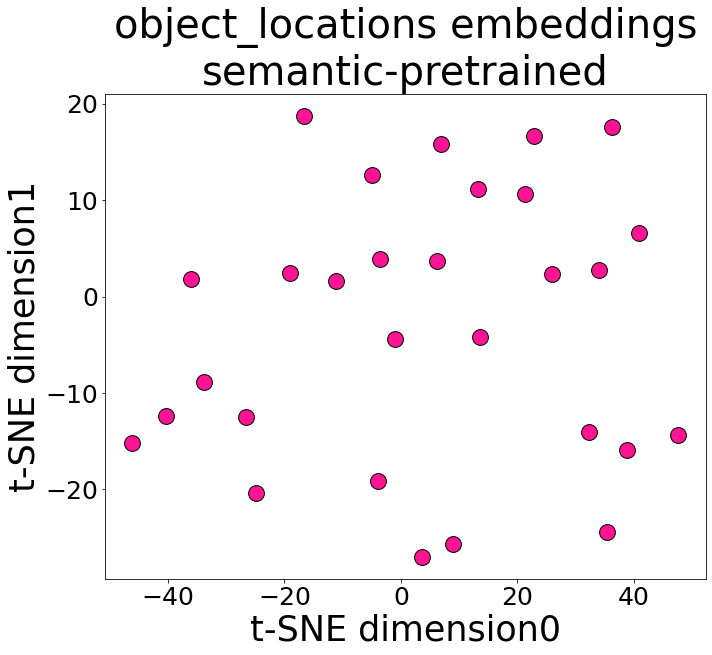

In [3]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import logging

logging.disable()

from plotting import (
    plot_training_validation_results,
    plot_test_results,
    plot_test_results_all_capacities,
    UnderstandModel,
)
from utils import read_json

plot_training_validation_results(
    data_dir="./data/v2-question_prob=0.1/",
    kind="val_total_reward_mean",
    capacity=32,
    save_dir="./figures/",
    ymin=-8,
    ymax=8,
    ylog=False,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="lower right",
)

plot_training_validation_results(
    data_dir="./data/v2-question_prob=0.1/",
    kind="train_loss",
    capacity=32,
    save_dir="./figures/",
    ymin=None,
    ymax=None,
    ylog=True,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="upper right",
)


plot_test_results(
    data_dir="./data/v2-question_prob=0.1/",
    capacity=32,
    save_dir="./figures/",
    ymin=-10,
    ymax=10,
    des_size="l",
    figsize=(10, 10),
    legend_loc="upper left",
    question_prob=0.1,
    allow_random_human=False,
    allow_random_question=True,
    version="v2",
)


plot_test_results_all_capacities(
    data_dir="./data/v2-question_prob=0.1/",
    save_dir="./figures/",
    ymin=-10,
    ymax=10,
    des_size="l",
    figsize=(25, 8),
    legend_loc="upper left",
    question_prob=0.1,
    allow_random_human=False,
    allow_random_question=True,
    version="v2",
)

test_debug_scratch_path = "./models/v2-question_prob=0.1/des_version=v2_allow_random_human=False_allow_random_question=True_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_seed=4/test_debug-mean=3.0-std=3.098.json"
test_debug_scratch = read_json(test_debug_scratch_path)["0"]
test_debug_pretrained_path = "./models/v2-question_prob=0.1/des_version=v2_allow_random_human=False_allow_random_question=True_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_seed=2/test_debug-mean=8.8-std=2.891.json"
test_debug_pretrained = read_json(test_debug_pretrained_path)["0"]

for step in [86]:
    print(f"STEP: {step}")
    print()
    print(f"SCRATCH: {test_debug_scratch[step]}")
    print()
    print(f"PRETRAINED: {test_debug_pretrained[step]}")
    print()
    print(
        "----------------------------------------------------------------------------"
    )


um = UnderstandModel(
    model_scratch_path="./models/v2-question_prob=0.1/des_version=v2_allow_random_human=False_allow_random_question=True_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_seed=4/checkpoints/epoch=06-val_total_reward_mean=3.10-val_total_reward_std=2.84.ckpt",
    model_pretrained_path="./models/v2-question_prob=0.1/des_version=v2_allow_random_human=False_allow_random_question=True_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_seed=2/checkpoints/epoch=11-val_total_reward_mean=8.10-val_total_reward_std=4.06.ckpt",
)

um.compute_reduction(
    tsne_params={
        "n_components": 2,
        "perplexity": 5,
        "init": "pca",
        "learning_rate": "auto",
    }
)

print(
    len(um.indices["humans"]),
    len(um.indices["objects"]),
    len(um.indices["object_locations"]),
)

for semantic in ["scratch", "pretrained"]:
    for interest in ["humans", "objects", "object_locations"]:
        um.plot_embeddings(semantic=semantic, interest=interest)

## v1-question_prob=0.1

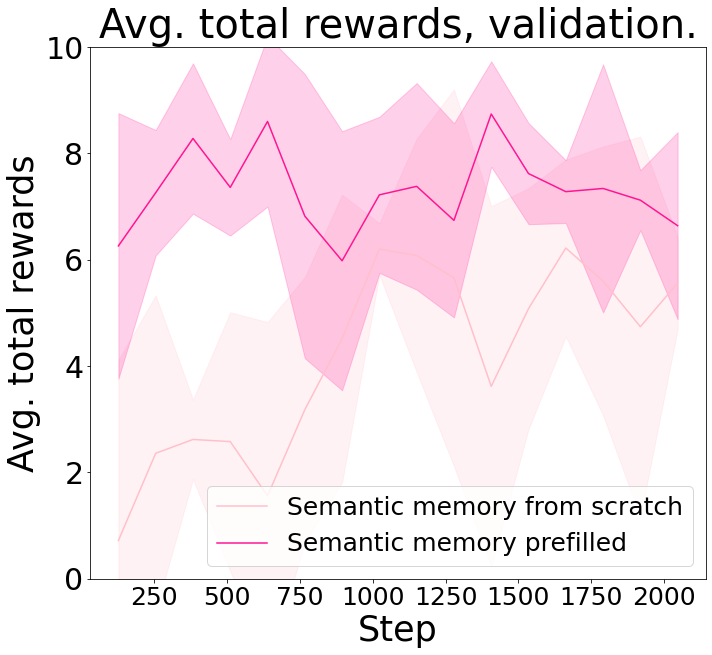

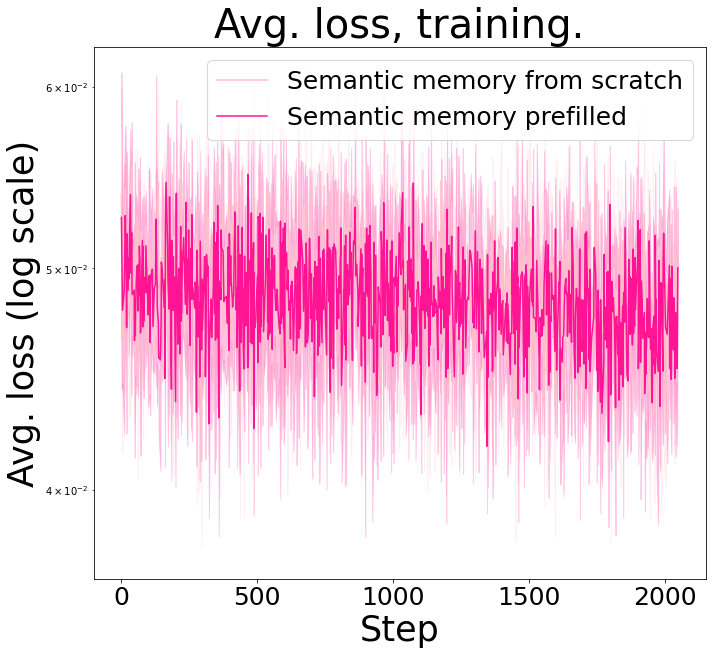

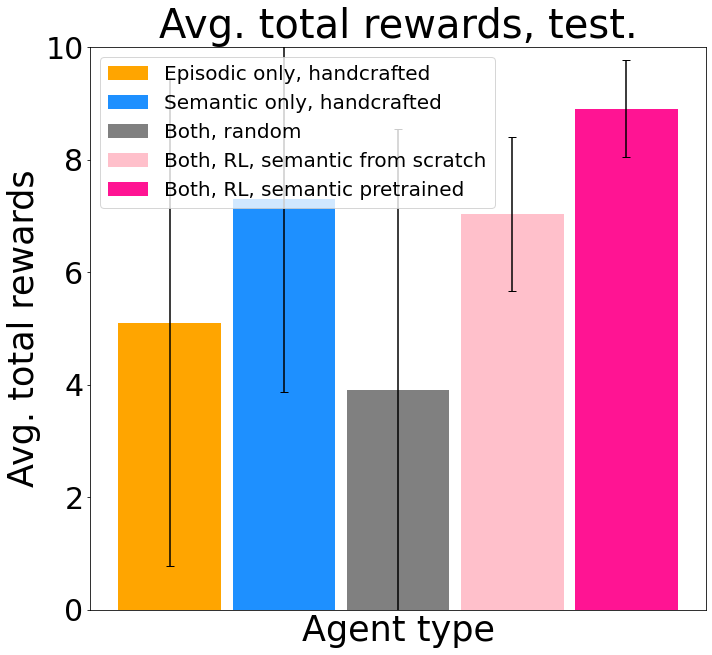

In [1]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import logging

logging.disable()

from plotting import (
    plot_training_validation_results,
    plot_test_results,
    plot_test_results_all_capacities,
    UnderstandModel,
)
from utils import read_json

plot_training_validation_results(
    data_dir="./data/v1-question_prob=0.1/",
    kind="val_total_reward_mean",
    capacity=32,
    save_dir="./figures/",
    ymin=0,
    ymax=10,
    ylog=False,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="lower right",
)

plot_training_validation_results(
    data_dir="./data/v1-question_prob=0.1/",
    kind="train_loss",
    capacity=32,
    save_dir="./figures/",
    ymin=None,
    ymax=None,
    ylog=True,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="upper right",
)


plot_test_results(
    data_dir="./data/v1-question_prob=0.1/",
    capacity=32,
    save_dir="./figures/",
    ymin=0,
    ymax=10,
    des_size="l",
    figsize=(10, 10),
    legend_loc="upper left",
    question_prob=0.1,
    allow_random_human=False,
    allow_random_question=False,
    version="v1",
)


# plot_test_results_all_capacities(
#     data_dir="./data/v1-question_prob=0.1/",
#     save_dir="./figures/",
#     ymin=-13,
#     ymax=13,
#     des_size="l",
#     figsize=(25, 8),
#     legend_loc="upper left",
#     question_prob=0.1,
#     allow_random_human=False,
#     allow_random_question=False,
#     version="v1",
# )

# test_debug_scratch_path = "./models/v1-question_prob=0.1/des_version=v1_allow_random_human=False_allow_random_question=False_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_question_prob=0.1_seed=4/test_debug-mean=9.2-std=2.926.json"
# test_debug_scratch = read_json(test_debug_scratch_path)["0"]
# test_debug_pretrained_path = "./models/v1-question_prob=0.1/des_version=v1_allow_random_human=False_allow_random_question=False_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_question_prob=0.1_seed=0/test_debug-mean=9.9-std=2.737.json"
# test_debug_pretrained = read_json(test_debug_pretrained_path)["0"]

# for step in [86]:
#     print(f"STEP: {step}")
#     print()
#     print(f"SCRATCH: {test_debug_scratch[step]}")
#     print()
#     print(f"PRETRAINED: {test_debug_pretrained[step]}")
#     print()
#     print(
#         "----------------------------------------------------------------------------"
#     )


# um = UnderstandModel(
#     model_scratch_path="./models/v1-question_prob=0.1/des_version=v1_allow_random_human=False_allow_random_question=False_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_question_prob=0.1_seed=4/checkpoints/epoch=13-val_total_reward_mean=8.30-val_total_reward_std=2.19.ckpt",
#     model_pretrained_path="./models/v1-question_prob=0.1/des_version=v1_allow_random_human=False_allow_random_question=False_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_question_prob=0.1_seed=0/checkpoints/epoch=13-val_total_reward_mean=11.30-val_total_reward_std=3.69.ckpt",
# )

# um.compute_reduction(
#     tsne_params={
#         "n_components": 2,
#         "perplexity": 5,
#         "init": "pca",
#         "learning_rate": "auto",
#     }
# )

# print(
#     len(um.indices["humans"]),
#     len(um.indices["objects"]),
#     len(um.indices["object_locations"]),
# )

# for semantic in ["scratch", "pretrained"]:
#     for interest in ["humans", "objects", "object_locations"]:
#         um.plot_embeddings(semantic=semantic, interest=interest)

## v1-question_prob=0.5

There were three more experiments that are not in the plot:

1. Episodic only, capacity=32, avg. and std. of total test rewards=(24.58, 1.669)
2. Semantic only, capacity=32, avg. and std. of total test rewards=(28.02, 3.024)
3. Semantic only, pretrained, capacity=32, avg. and std. of total test rewards=(29.840, 1.597)

The reason why they were not mentioned in the paper is that the performance is not so different from the two baseline heuristics.

STEP: 86

SCRATCH: {'state': ["[{'human': 'Arthur', 'object': 'donut', 'object_location': 'bakery', 'timestamp': 4}, {'human': 'Barbara', 'object': 'donut', 'object_location': 'lap', 'timestamp': 5}, {'human': 'Billy', 'object': 'bird', 'object_location': 'tree', 'timestamp': 7}, {'human': 'Brenda', 'object': 'bowl', 'object_location': 'farm', 'timestamp': 8}, {'human': 'Brittany', 'object': 'keyboard', 'object_location': 'cupboard', 'timestamp': 9}, {'human': 'Donald', 'object': 'dog', 'object_location': 'kitchen', 'timestamp': 17}, {'human': 'Frank', 'object': 'train', 'object_location': 'circus', 'timestamp': 22}, {'human': 'Gloria', 'object': 'sheep', 'object_location': 'lap', 'timestamp': 23}, {'human': 'James', 'object': 'bicycle', 'object_location': 'nursery', 'timestamp': 28}, {'human': 'Judith', 'object': 'bird', 'object_location': 'kitchen', 'timestamp': 34}, {'human': 'Lauren', 'object': 'bird', 'object_location': 'countryside', 'timestamp': 41}, {'human': 'Lisa', 'object': 

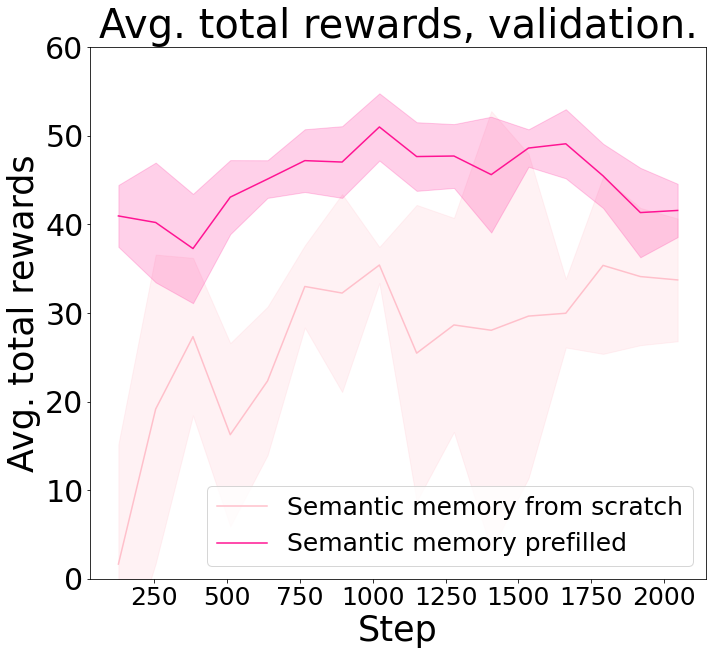

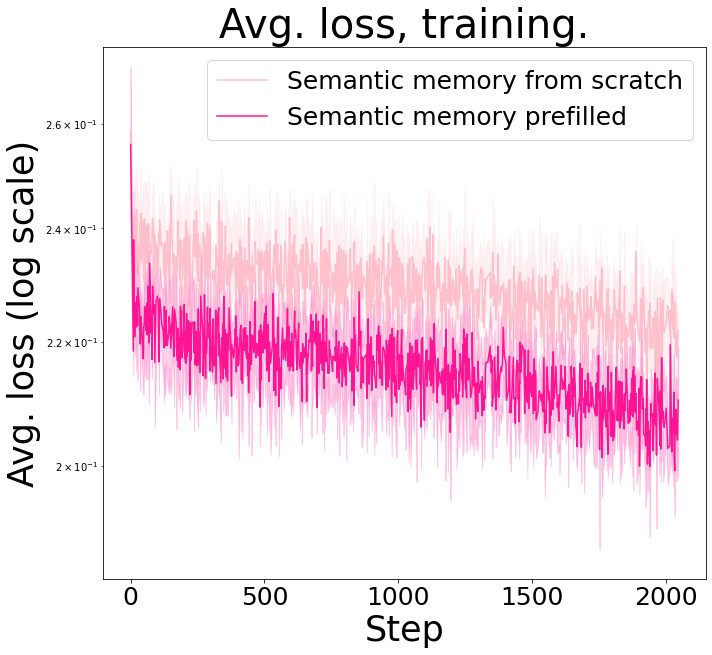

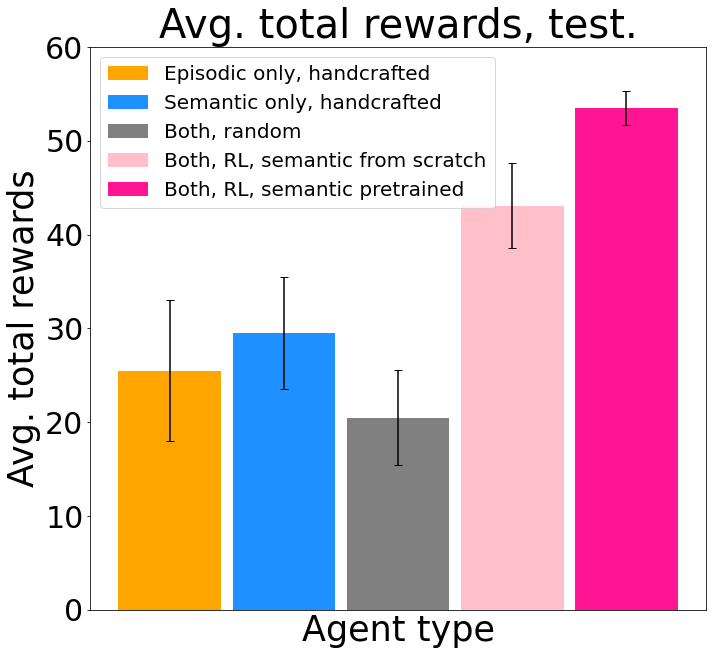

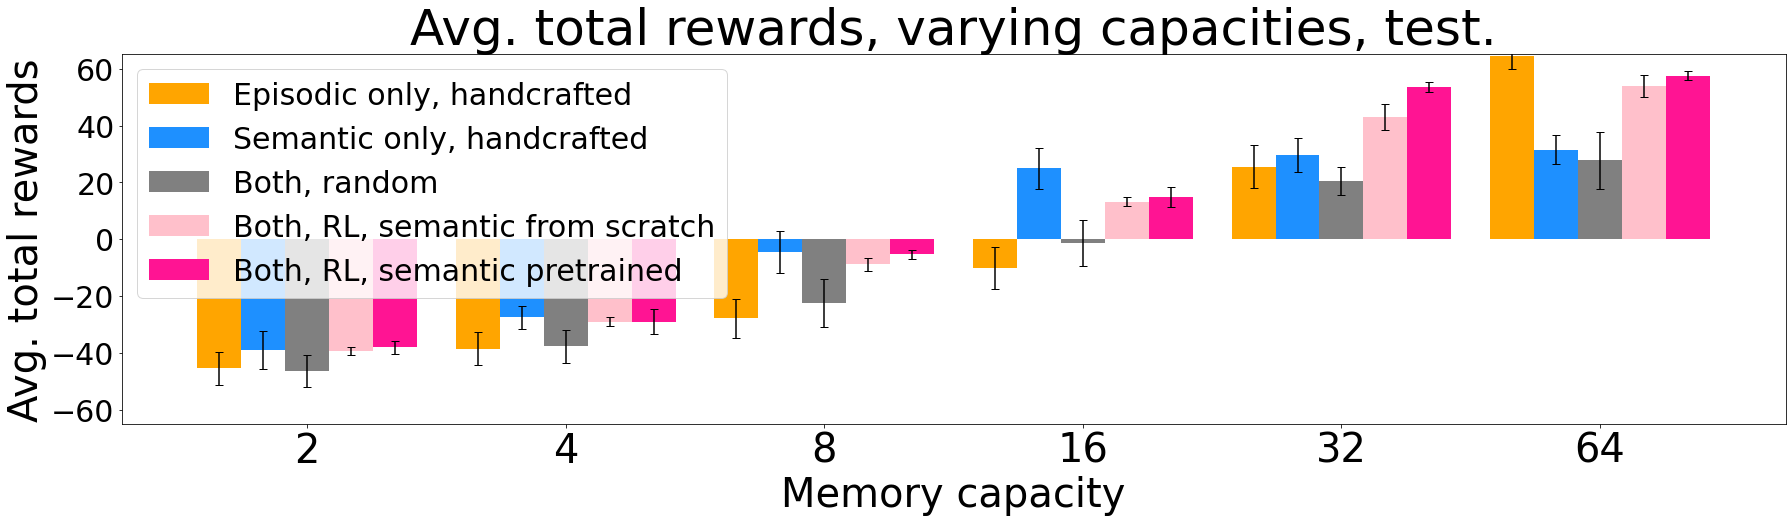

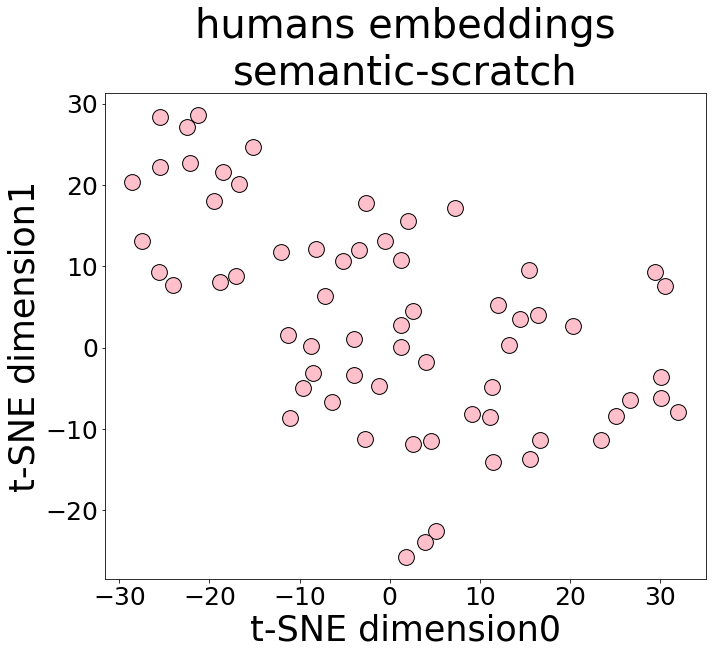

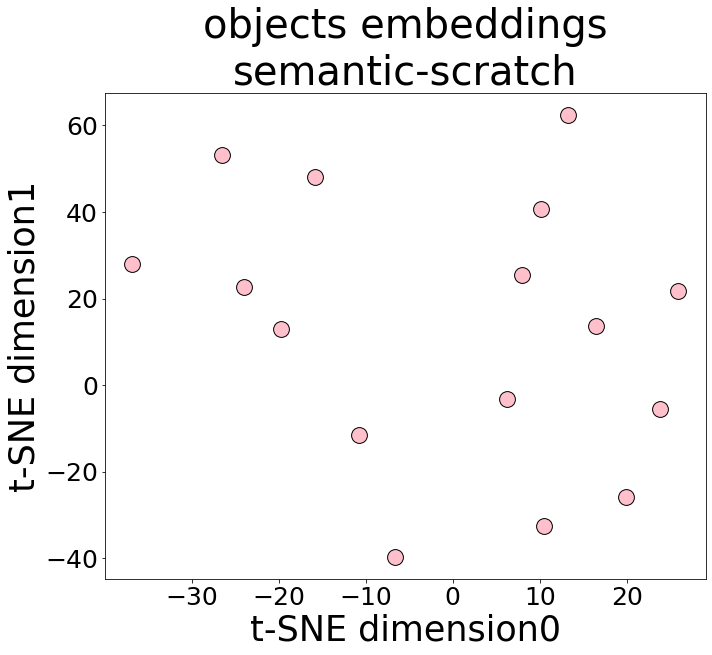

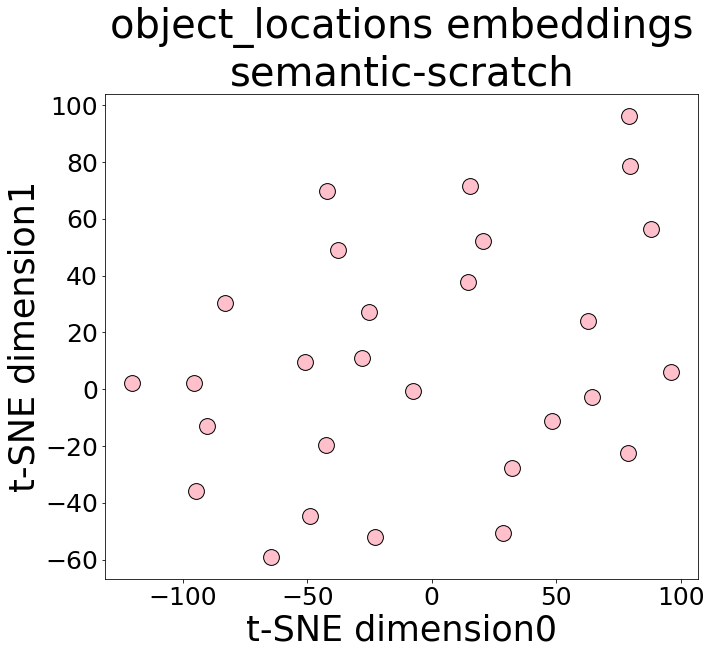

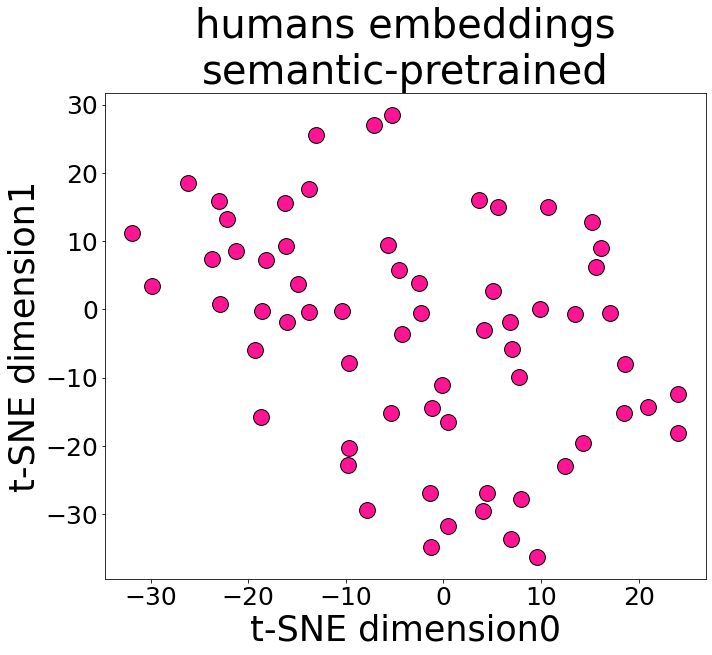

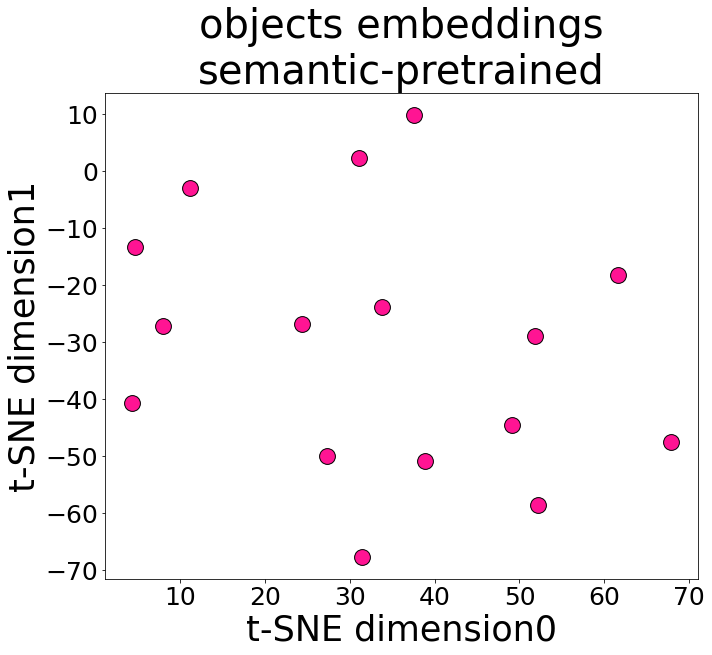

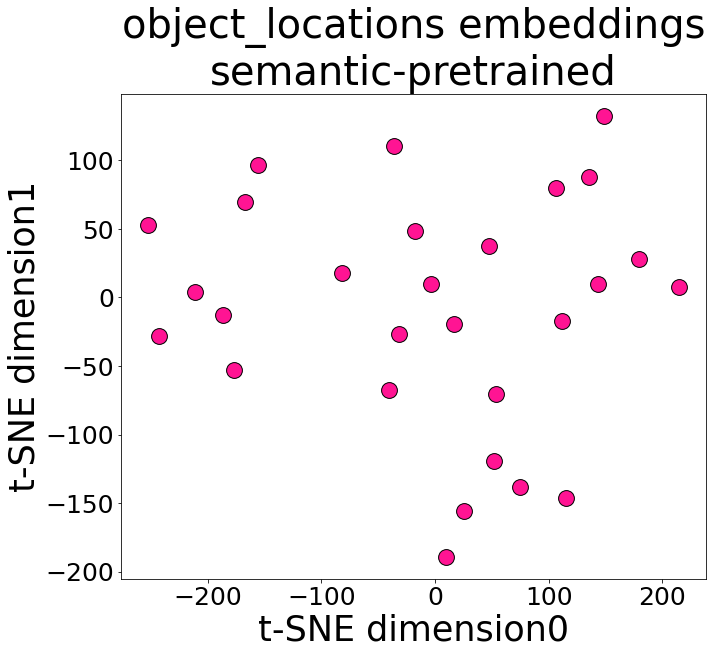

In [1]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import logging

logging.disable()

from plotting import (
    plot_training_validation_results,
    plot_test_results,
    plot_test_results_all_capacities,
    UnderstandModel,
)
from utils import read_json

plot_training_validation_results(
    data_dir="./data/v1-question_prob=0.5/",
    kind="val_total_reward_mean",
    capacity=32,
    save_dir="./figures/",
    ymin=0,
    ymax=60,
    ylog=False,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="lower right",
)

plot_training_validation_results(
    data_dir="./data/v1-question_prob=0.5/",
    kind="train_loss",
    capacity=32,
    save_dir="./figures/",
    ymin=None,
    ymax=None,
    ylog=True,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="upper right",
)


plot_test_results(
    data_dir="./data/v1-question_prob=0.5/",
    capacity=32,
    save_dir="./figures/",
    ymin=0,
    ymax=60,
    des_size="l",
    figsize=(10, 10),
    legend_loc="upper left",
    question_prob=0.5,
    allow_random_human=False,
    allow_random_question=False,
    version="v1",
)


plot_test_results_all_capacities(
    data_dir="./data/v1-question_prob=0.5/",
    save_dir="./figures/",
    ymin=-65,
    ymax=65,
    des_size="l",
    figsize=(25, 8),
    legend_loc="upper left",
    question_prob=0.5,
    allow_random_human=False,
    allow_random_question=False,
    version="v1",
)

test_debug_scratch_path = "./models/v1-question_prob=0.5/des_version=v1_allow_random_human=False_allow_random_question=False_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_question_prob=0.5_seed=4/test_debug-mean=48.4-std=7.473.json"
test_debug_scratch = read_json(test_debug_scratch_path)["0"]
test_debug_pretrained_path = "./models/v1-question_prob=0.5/des_version=v1_allow_random_human=False_allow_random_question=False_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_question_prob=0.5_seed=0/test_debug-mean=55.8-std=3.709.json"
test_debug_pretrained = read_json(test_debug_pretrained_path)["0"]

for step in [86]:
    print(f"STEP: {step}")
    print()
    print(f"SCRATCH: {test_debug_scratch[step]}")
    print()
    print(f"PRETRAINED: {test_debug_pretrained[step]}")
    print()
    print(
        "----------------------------------------------------------------------------"
    )


um = UnderstandModel(
    model_scratch_path="./models/v1-question_prob=0.5/des_version=v1_allow_random_human=False_allow_random_question=False_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_question_prob=0.5_seed=4/checkpoints/epoch=10-val_total_reward_mean=49.80-val_total_reward_std=6.61.ckpt",
    model_pretrained_path="./models/v1-question_prob=0.5/des_version=v1_allow_random_human=False_allow_random_question=False_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_question_prob=0.5_seed=0/checkpoints/epoch=12-val_total_reward_mean=53.80-val_total_reward_std=6.54.ckpt",
)

um.compute_reduction(
    tsne_params={
        "n_components": 2,
        "perplexity": 5,
        "init": "pca",
        "learning_rate": "auto",
    }
)

print(
    len(um.indices["humans"]),
    len(um.indices["objects"]),
    len(um.indices["object_locations"]),
)

for semantic in ["scratch", "pretrained"]:
    for interest in ["humans", "objects", "object_locations"]:
        um.plot_embeddings(semantic=semantic, interest=interest)

## v2-question_prob=0.5

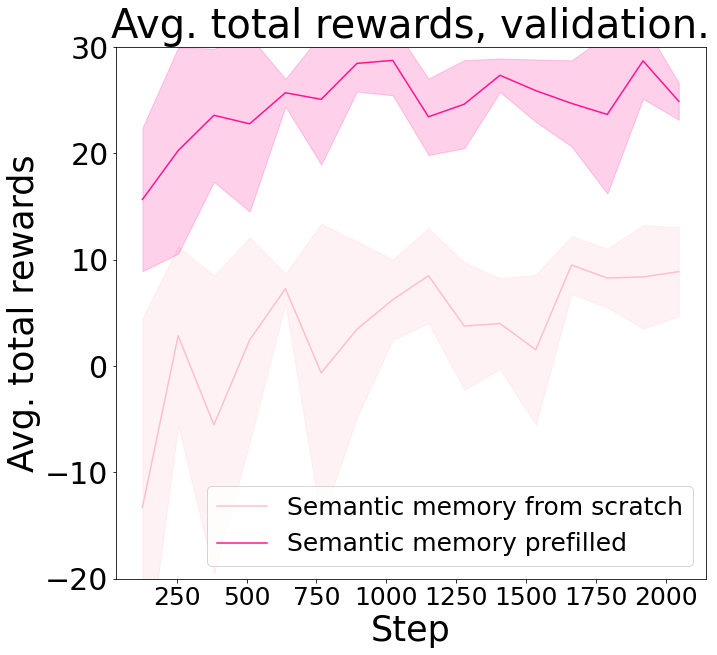

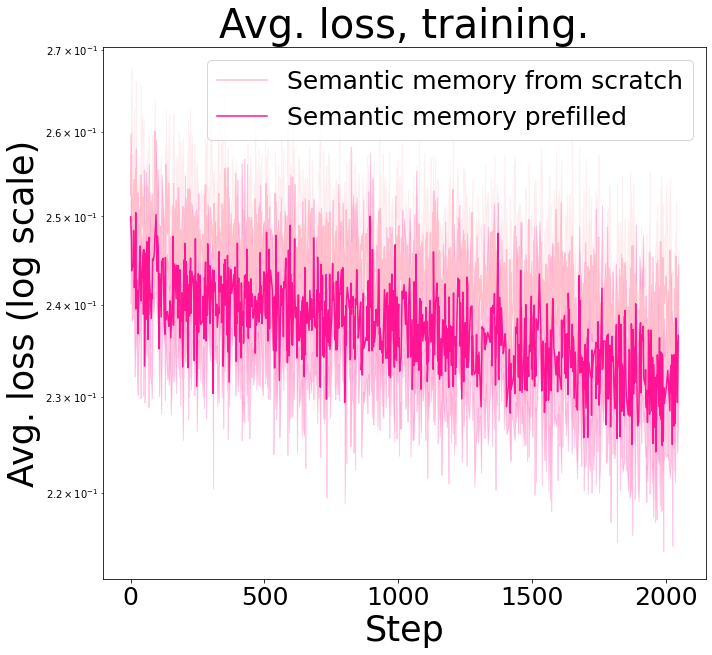

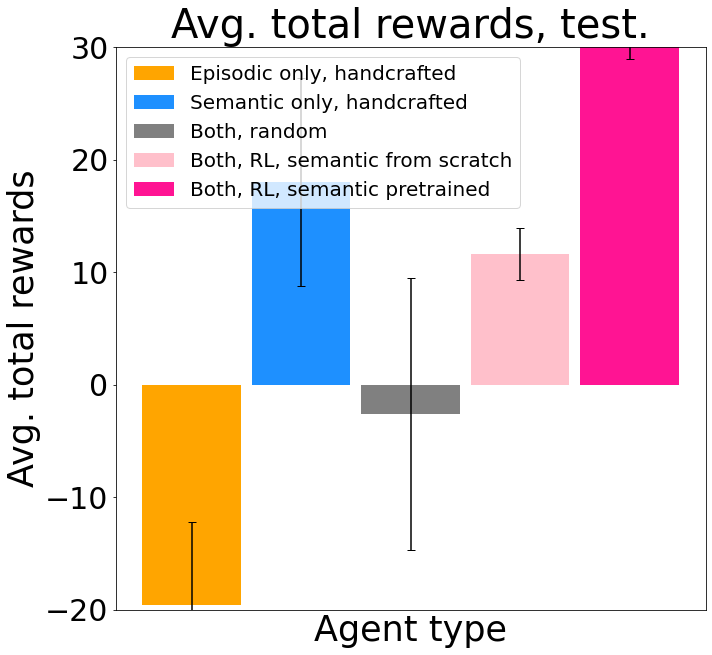

In [3]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import logging

logging.disable()

from plotting import (
    plot_training_validation_results,
    plot_test_results,
    plot_test_results_all_capacities,
    UnderstandModel,
)
from utils import read_json

plot_training_validation_results(
    data_dir="./data/v2-question_prob=0.5/",
    kind="val_total_reward_mean",
    capacity=32,
    save_dir="./figures/",
    ymin=-20,
    ymax=30,
    ylog=False,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="lower right",
)

plot_training_validation_results(
    data_dir="./data/v2-question_prob=0.5/",
    kind="train_loss",
    capacity=32,
    save_dir="./figures/",
    ymin=None,
    ymax=None,
    ylog=True,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="upper right",
)


plot_test_results(
    data_dir="./data/v2-question_prob=0.5/",
    capacity=32,
    save_dir="./figures/",
    ymin=-20,
    ymax=30,
    des_size="l",
    figsize=(10, 10),
    legend_loc="upper left",
    question_prob=0.5,
    allow_random_human=False,
    allow_random_question=True,
    version="v2",
)


# plot_test_results_all_capacities(
#     data_dir="./data/v2-question_prob=0.5/",
#     save_dir="./figures/",
#     ymin=-65,
#     ymax=65,
#     des_size="l",
#     figsize=(25, 8),
#     legend_loc="upper left",
#     question_prob=0.5,
#     allow_random_human=False,
#     allow_random_question=True,
#     version="v2",
# )

# test_debug_scratch_path = "./models/v2-question_prob=0.5/des_version=v2_allow_random_human=False_allow_random_question=True_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_question_prob=0.5_seed=2/test_debug-mean=15.4-std=5.953.json"
# test_debug_scratch = read_json(test_debug_scratch_path)["0"]
# test_debug_pretrained_path = "./models/v2-question_prob=0.5/des_version=v2_allow_random_human=False_allow_random_question=True_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_question_prob=0.5_seed=0/test_debug-mean=33.1-std=7.286.json"
# test_debug_pretrained = read_json(test_debug_pretrained_path)["0"]

# for step in [86]:
#     print(f"STEP: {step}")
#     print()
#     print(f"SCRATCH: {test_debug_scratch[step]}")
#     print()
#     print(f"PRETRAINED: {test_debug_pretrained[step]}")
#     print()
#     print(
#         "----------------------------------------------------------------------------"
#     )


# um = UnderstandModel(
#     model_scratch_path="./models/v2-question_prob=0.5/des_version=v2_allow_random_human=False_allow_random_question=True_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_question_prob=0.5_seed=2/checkpoints/epoch=13-val_total_reward_mean=12.70-val_total_reward_std=6.18.ckpt",
#     model_pretrained_path="./models/v2-question_prob=0.5/des_version=v2_allow_random_human=False_allow_random_question=True_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_question_prob=0.5_seed=0/checkpoints/epoch=07-val_total_reward_mean=33.40-val_total_reward_std=5.33.ckpt",
# )

# um.compute_reduction(
#     tsne_params={
#         "n_components": 2,
#         "perplexity": 5,
#         "init": "pca",
#         "learning_rate": "auto",
#     }
# )

# print(
#     len(um.indices["humans"]),
#     len(um.indices["objects"]),
#     len(um.indices["object_locations"]),
# )

# for semantic in ["scratch", "pretrained"]:
#     for interest in ["humans", "objects", "object_locations"]:
#         um.plot_embeddings(semantic=semantic, interest=interest)

## v2-question_prob=1.0

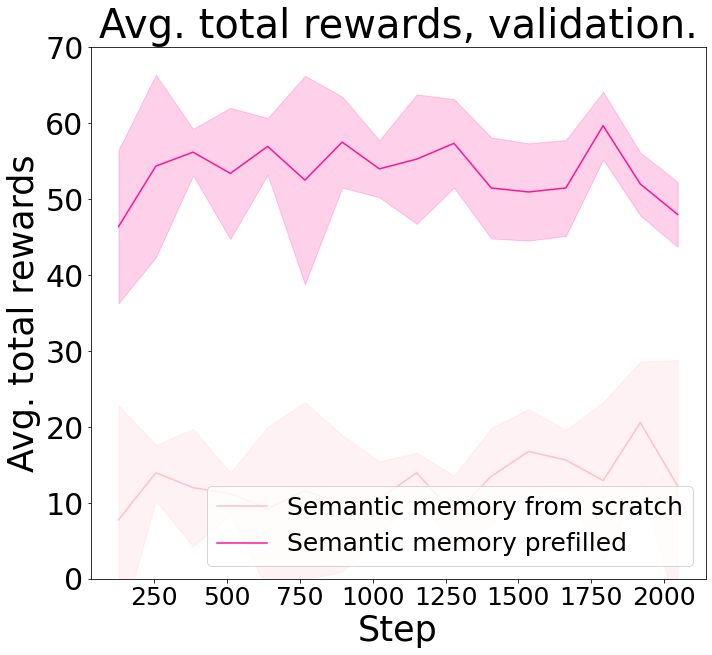

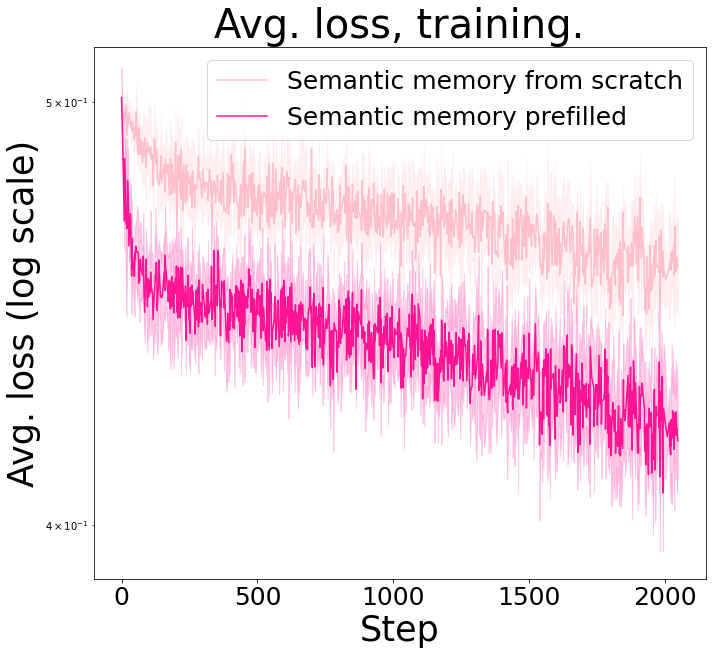

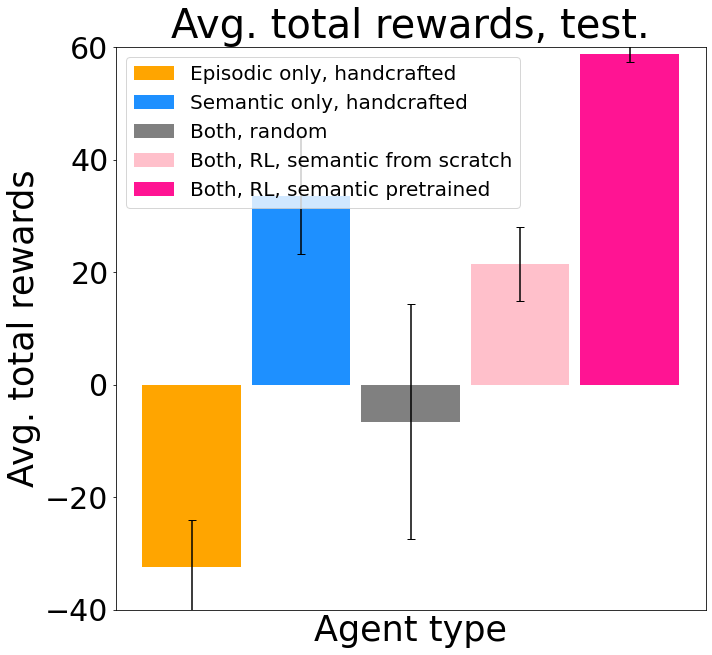

In [4]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import logging

logging.disable()

from plotting import (
    plot_training_validation_results,
    plot_test_results,
    plot_test_results_all_capacities,
    UnderstandModel,
)
from utils import read_json

plot_training_validation_results(
    data_dir="./data/v2-question_prob=1.0/",
    kind="val_total_reward_mean",
    capacity=32,
    save_dir="./figures/",
    ymin=0,
    ymax=70,
    ylog=False,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="lower right",
)

plot_training_validation_results(
    data_dir="./data/v2-question_prob=1.0/",
    kind="train_loss",
    capacity=32,
    save_dir="./figures/",
    ymin=None,
    ymax=None,
    ylog=True,
    xlabel="Step",
    figsize=(10, 10),
    legend_loc="upper right",
)

plot_test_results(
    data_dir="./data/v2-question_prob=1.0/",
    capacity=32,
    save_dir="./figures/",
    ymin=-40,
    ymax=60,
    des_size="l",
    figsize=(10, 10),
    legend_loc="upper left",
    question_prob=1.0,
    allow_random_human=False,
    allow_random_question=True,
    version="v2",
)

# plot_test_results_all_capacities(
#     data_dir="./data/v2-question_prob=1.0/",
#     save_dir="./figures/",
#     ymin=-128,
#     ymax=128,
#     des_size="l",
#     figsize=(25, 8),
#     legend_loc="upper left",
#     question_prob=1.0,
#     allow_random_human=False,
#     allow_random_question=True,
#     version="v2",
# )

# test_debug_scratch_path = "./models/v2-question_prob=1.0/des_version=v2_allow_random_human=False_allow_random_question=True_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_question_prob=1.0_seed=4/test_debug-mean=32.4-std=7.579.json"
# test_debug_scratch = read_json(test_debug_scratch_path)["0"]
# test_debug_pretrained_path = "./models/v2-question_prob=1.0/des_version=v2_allow_random_human=False_allow_random_question=True_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_question_prob=1.0_seed=2/test_debug-mean=60.8-std=10.591.json"
# test_debug_pretrained = read_json(test_debug_pretrained_path)["0"]

# for step in [86]:
#     print(f"STEP: {step}")
#     print()
#     print(f"SCRATCH: {test_debug_scratch[step]}")
#     print()
#     print(f"PRETRAINED: {test_debug_pretrained[step]}")
#     print()
#     print(
#         "----------------------------------------------------------------------------"
#     )

# um = UnderstandModel(
#     model_scratch_path="./models/v2-question_prob=1.0/des_version=v2_allow_random_human=False_allow_random_question=True_pretrain_semantic=False_varying_rewards=False_des_size=l_capacity=32_question_prob=1.0_seed=4/checkpoints/epoch=14-val_total_reward_mean=31.00-val_total_reward_std=11.11.ckpt",
#     model_pretrained_path="./models/v2-question_prob=1.0/des_version=v2_allow_random_human=False_allow_random_question=True_pretrain_semantic=True_varying_rewards=False_des_size=l_capacity=32_question_prob=1.0_seed=2/checkpoints/epoch=05-val_total_reward_mean=60.80-val_total_reward_std=12.24.ckpt",
# )

# um.compute_reduction(
#     tsne_params={
#         "n_components": 2,
#         "perplexity": 5,
#         "init": "pca",
#         "learning_rate": "auto",
#     }
# )

# print(
#     len(um.indices["humans"]),
#     len(um.indices["objects"]),
#     len(um.indices["object_locations"]),
# )

# for semantic in ["scratch", "pretrained"]:
#     for interest in ["humans", "objects", "object_locations"]:
#         um.plot_embeddings(semantic=semantic, interest=interest)